# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# DIEGO ANTONIO NAVARRO RAMIREZ - A01645389

# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [3]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

# Importing data

In [4]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [5]:
# Print the dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2. Drop rows with any missing values


In [6]:
dataset.dropna()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3. Encoding the class label categorical column: from string to num


In [7]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
newdataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})

#Visualize the dataset
newdataset

C:\Users\diego\AppData\Local\Temp\ipykernel_18584\735689371.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newdataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [8]:
# If necesary, drop out non necesary columns
#NOT NECESSARY

5. Scatter plot of the data

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

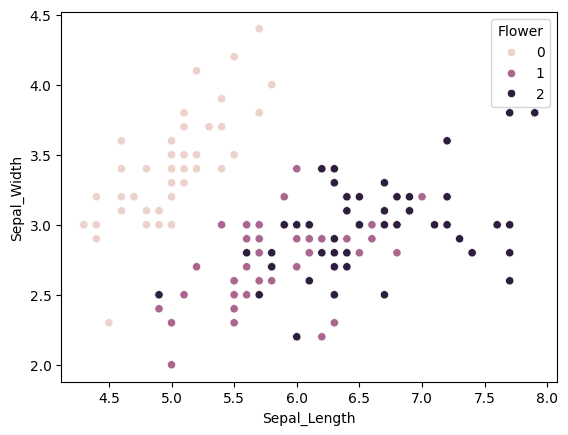

In [9]:
sns.scatterplot(x = "Sepal_Length", y = "Sepal_Width", data = newdataset, hue = "Flower")

<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

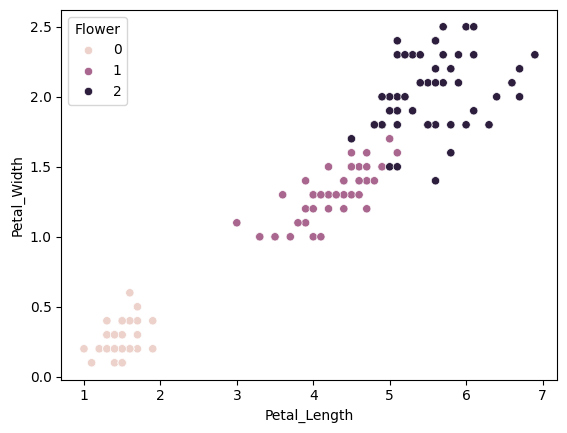

In [10]:
sns.scatterplot(x = "Petal_Length", y = "Petal_Width", data = newdataset, hue = "Flower")

<Axes: xlabel='Petal_Length', ylabel='Sepal_Width'>

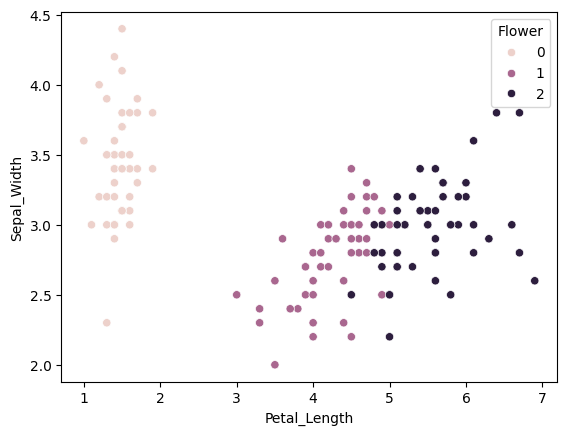

In [11]:
sns.scatterplot(x = "Petal_Length", y = "Sepal_Width", data = newdataset, hue = "Flower")

<Axes: xlabel='Sepal_Length', ylabel='Petal_Width'>

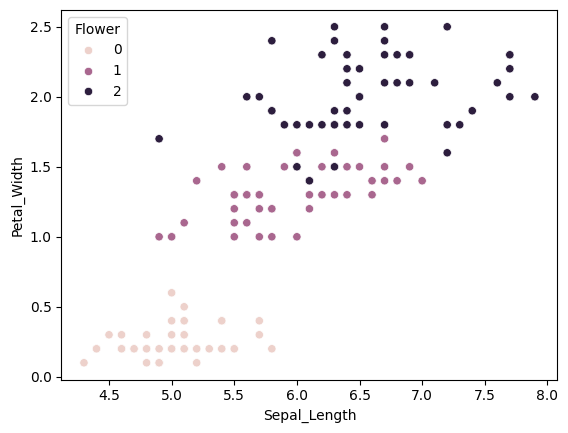

In [12]:
sns.scatterplot(x = "Sepal_Length", y = "Petal_Width", data = newdataset, hue = "Flower")

<Axes: xlabel='Sepal_Length', ylabel='Petal_Length'>

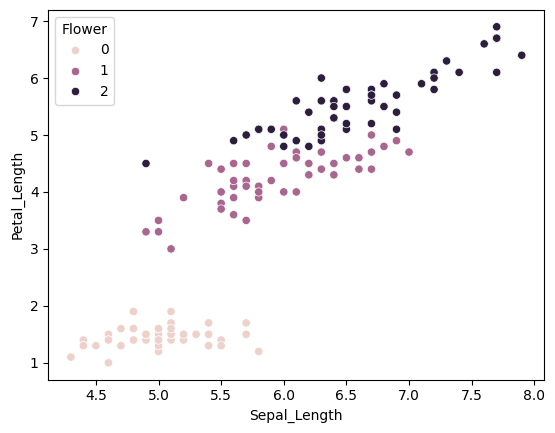

In [13]:
sns.scatterplot(x = "Sepal_Length", y = "Petal_Length", data = newdataset, hue = "Flower")

<Axes: xlabel='Sepal_Width', ylabel='Petal_Width'>

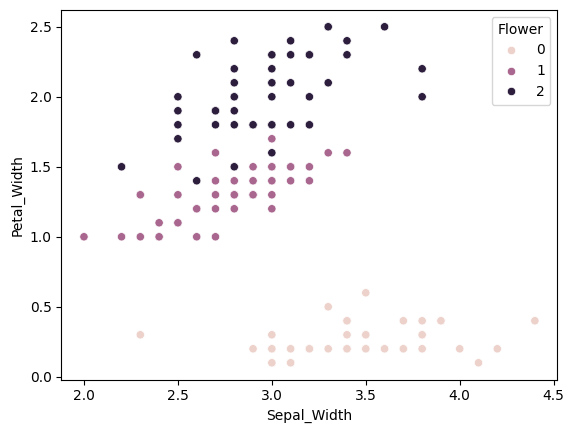

In [14]:
sns.scatterplot(x = "Sepal_Width", y = "Petal_Width", data = newdataset, hue = "Flower", )

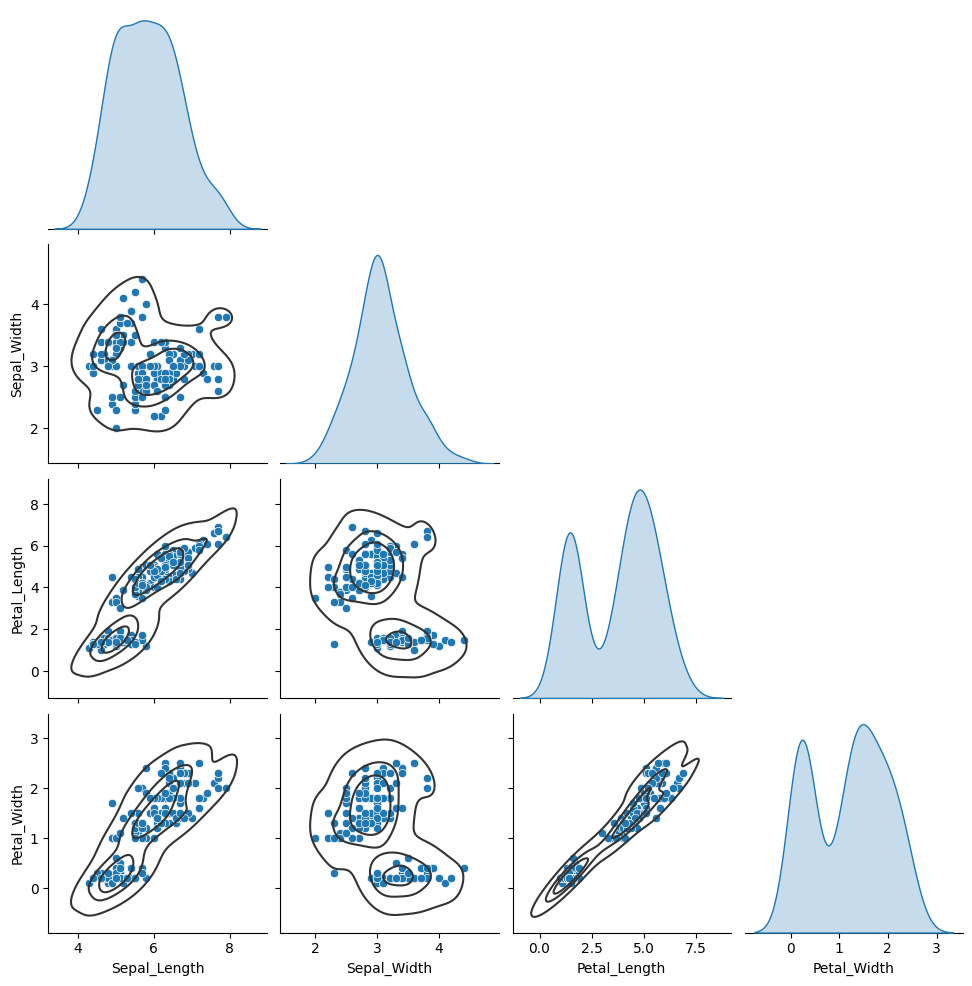

In [15]:
# Pairplot: Scatterplot of all variables
clstr = sns.pairplot(dataset, corner=True, diag_kind="kde")
clstr.map_lower(sns.kdeplot, levels=4, color=".2")

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [16]:
# Get dataframes for each real cluster
df1 = newdataset[newdataset["Flower"] == 0]
df2 = newdataset[newdataset["Flower"] == 1]
df3 = newdataset[newdataset["Flower"] == 2]


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [17]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
Cluster1 = km.fit_predict(dataset[['Petal_Length','Petal_Width']] )
Cluster2 = km.fit_predict(dataset[['Sepal_Length','Sepal_Width']] )

# Print estimated cluster of each point in the dataset
print(Cluster1)
print(Cluster2)

# Print real cluster of each observations in the dataset
newdataset.Flower.values

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [18]:
# Manual pairing the labels of the real and estimated clusters
Cluster1Paired = np.choose(Cluster1, [2, 0, 1]).astype(int) # CHANGE USING THE ORDER THE LABEL ESTIMATED
Cluster1Paired

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = Cluster1Paired

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [20]:
# Label of the estimated clusters
dataset.Cluster1.unique()


array([0, 2, 1])

In [21]:
# Cluster centroides
km.cluster_centers_



array([[5.8       , 2.7       ],
       [5.00392157, 3.4       ],
       [6.82391304, 3.07826087]])

In [22]:
# Sum of squared error (sse) of the final model
km.inertia_


37.14117220801364

In [23]:
# The number of iterations required to converge
km.n_iter_


14

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [ ]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

In [ ]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

# Get dataframes for each estimated cluster
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0',      c='white', edgecolor='r', marker='^', s=16, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1',      c='white', edgecolor='g', marker='<', s=16, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2',      c='white', edgecolor='b', marker='>', s=16, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

#plt.xlim(4,6)
#plt.ylim(1,2)

plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [29]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)


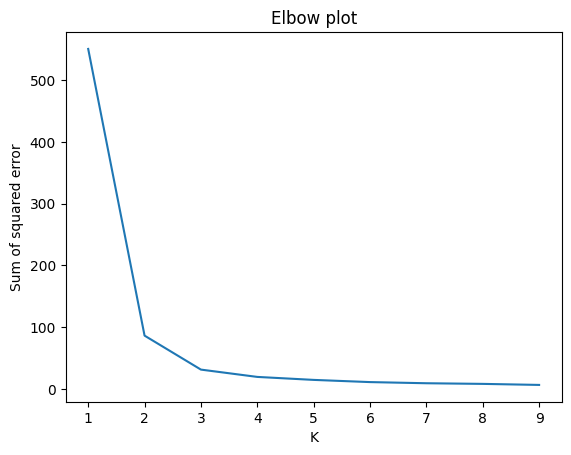

In [30]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k